# Pymaceuticals Inc.
---

### Analysis

- will add upon resubmission, see readme
 

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [140]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [141]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [142]:
# Combine the data into a single DataFrame

combined_study_df = pd.merge(mouse_metadata, study_results, how="left", on= "Mouse ID")


# Display the data table for preview
combined_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [143]:
# Checking the number of mice. 249

mice_count = len(combined_study_df["Mouse ID"].unique())
mice_count

249

In [144]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_study_df.loc[combined_study_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice                                          

array(['g989'], dtype=object)

In [145]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_df = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989",:]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [146]:
combined_study_df.count

<bound method DataFrame.count of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898

In [147]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df.drop_duplicates(subset=None, keep=’first’, inplace=False) help from stack overflow

#cleaned_study_df = combined_study_df.drop_duplicates(subset=["Mouse ID"])
#cleaned_study_df

In [148]:
# Checking the number of mice in the clean DataFrame. 248 
cleaned_mice = len(cleaned_study_df["Mouse ID"].unique())
cleaned_mice


249

In [157]:
cleaned_study_df1 = combined_study_df[combined_study_df['Mouse ID'].isin(duplicate_mice)==False]
len(cleaned_study_df1["Mouse ID"].unique())

248

In [164]:
cleaned_study_df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [158]:
cleaned_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [159]:
cleaned_study_df1[cleaned_study_df1["Mouse ID"] == "g989"]
                 
            


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [160]:
cleaned_study_df1["Tumor Volume (mm3)"].unique()

array([45.        , 38.82589807, 35.01427146, ..., 69.17624607,
       70.31490411, 73.86784476])

## Summary Statistics

In [161]:
drug_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [162]:
# Generate a summary statistics table of mean, median, variance, std dev, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



drug_mean = cleaned_study_df1.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = cleaned_study_df1.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_variance = cleaned_study_df1.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = cleaned_study_df1.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sem = cleaned_study_df1.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()



tumor_sizes_summary = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                                   "Median Tumor Volume": drug_median,
                                   "Tumor Volume Variance": drug_variance,
                                   "Tumor Volume Std Dev": drug_std,
                                   "Tumor Volume Std Err": drug_sem})

tumor_sizes_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [173]:
import numpy as np

<Axes: title={'center': 'Drug Regimen Observed Mice Time Points'}, xlabel='Drug Regimen', ylabel='# of Observed Mice Timepoints'>

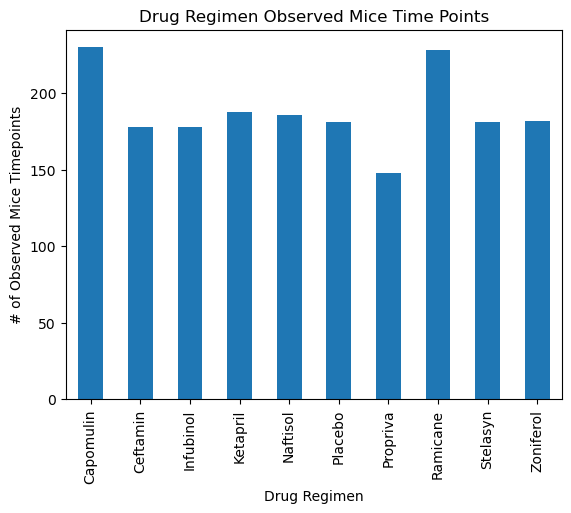

In [182]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_drug_timepoints = cleaned_study_df1.groupby(["Drug Regimen"]).count()["Mouse ID"]

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")
bar_drug_timepoints.plot.bar(title = "Drug Regimen Observed Mice Time Points")




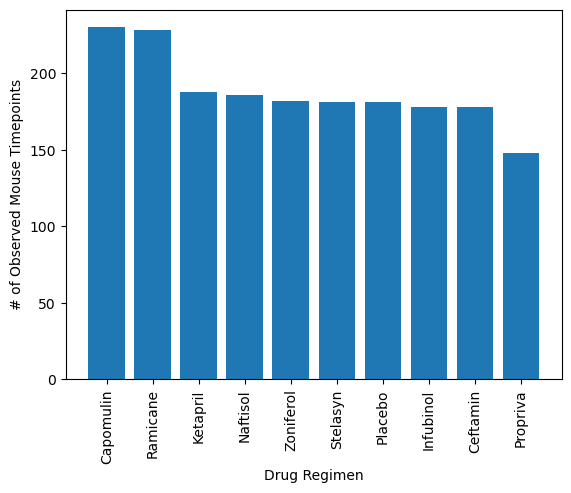

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimens = cleaned_study_df1['Drug Regimen'].unique()


x_axis = drug_regimens
y_axis = cleaned_study_df1.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations = x_axis
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")
plt.title("Drug Regimen Observed Mice Time Points")

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, rotation= 90)
plt.show()


In [ ]:
# Labels for the sections of our pie chart
labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.2, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

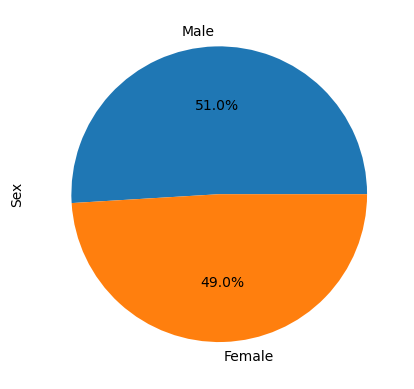

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = pd.DataFrame({"sex": [51.0, 49.0]},
                    index=["male", "female"])
plot = sex_df.plot.pie(y="sex", figsize=(5, 5))

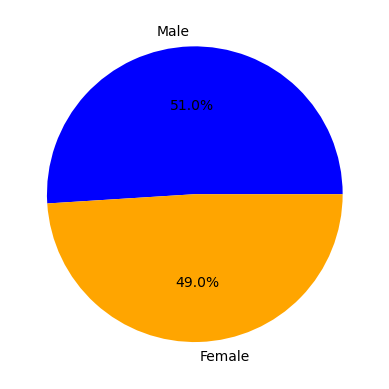

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

sizes = [51, 49]

colors = ["blue", "orange"]

plt.pie(sizes, labels = labels, colors = colors,
       autopct = "%1.1f%%", startangle = 0)
plt.show()


## Quartiles, Outliers and Boxplots

In [203]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint_df = cleaned_study_df1.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
greatest_timepoint_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [204]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = greatest_timepoint_df.merge(cleaned_study_df1, on = ["Mouse ID", "Timepoint"], how = "left")
last_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


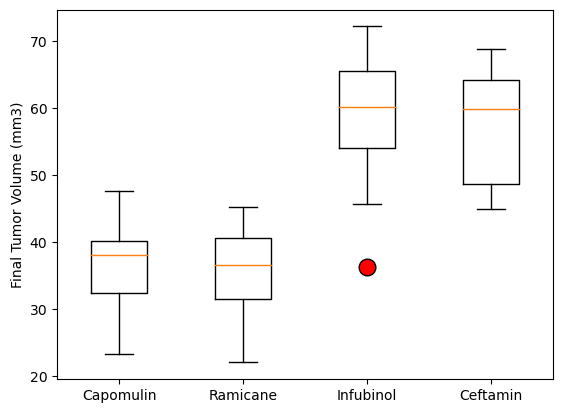

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

ValueError: Axis limits cannot be NaN or Inf

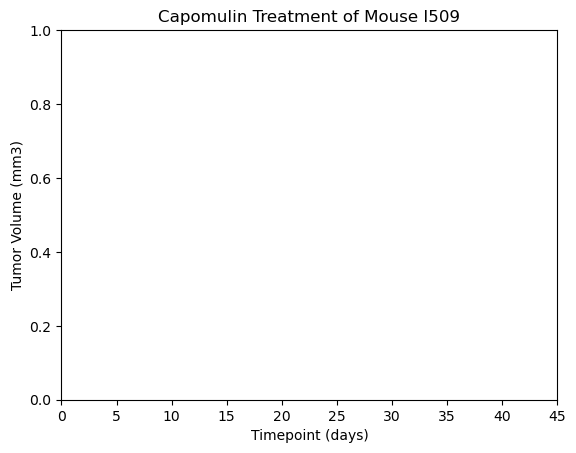

In [201]:
#series for specific drug
capomulin_series = cleaned_study_df1[cleaned_study_df1["Drug Regimen"]== "Capomulin"]

#series for specific mouse
mouseI509 = capomulin_series.loc[capomulin_series["Mouse ID"] == "I509"]
mouseI509.dropna()
#timepoints = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.title("Capomulin Treatment of Mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 45)
plt.ylim(mouseI509["Tumor Volume (mm3)"].min(), mouseI509["Tumor Volume (mm3)"].max())

plt.plot(mouseI509["Timepoint"], mouseI509["Tumor Volume (mm3)"])

In [198]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin




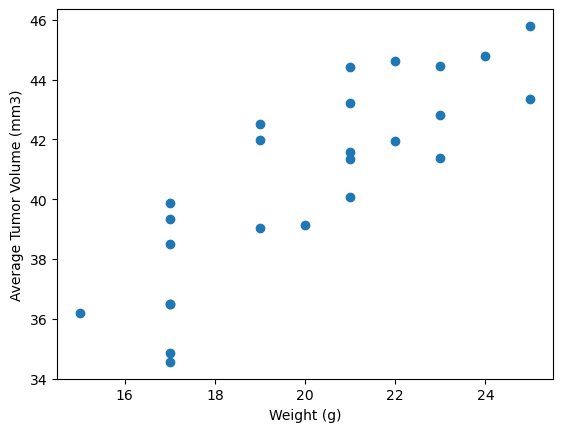

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


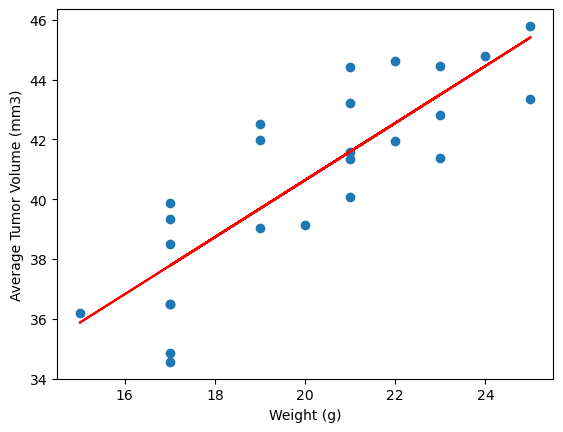

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
